# Matplotlib-challenge

***Note: ipywidgets work better in jupyter notebook.  They show up in log in jupyter lab***

***Dependencies***

In [1]:
import importlib
import ipywidgets as widgets
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd

##### Created these python modules to store code

In [2]:
from src import * 
from exercises import * 

# Exercises
- code for exercises is in exercises.py
- if in jupyter notebook, select one of the exercises in the dropdown, and the output should be displayed!  (let me know if I should reformat the notebook! Regards)

In [3]:
import exercises
importlib.reload(exercises)
exerciseList = ["SELECT EXERCISE", \
           "1. Checking the number of mice", 
           "2. Generate a  summary table", 
           "3a. Generate a plot using Panda's dataframe .plot() that shows the total mice for each treatment regimen",
           "3b. Generate a plot using Matplotlib's pyplot that shows the total mice for each treatment regimen",
           "4a. Generate a pie plot using Panda's dataframe .plot() that shows the distribution of female or male mice in the study",
           "4b. Generate a pie plot using Matplotlib's pyplot that shows the distribution of female or male mice in the study",
           "5a. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin",
           "6a. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.",
           "6b. Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.",
           "7. Select a mouse that was treated with Capomulin and generate a line plot of time point versus tumor volume for that mouse.",
           "8. Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.",
           "9. Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.",    
           "10. Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.",
           "10a. Observation 1",
           "10b. Observation 2",
           "10c. Observation 3"
               ]
dpnExercises = widgets.Dropdown(options=exerciseList)

exercises.show_tasks_dropdown(dpnExercises)

Dropdown(options=('SELECT EXERCISE', '1. Checking the number of mice', '2. Generate a  summary table', "3a. Ge…

### 1. Checking the number of mice

In [4]:
df = src.get_raw_data()
numMice = len(set(df["Mouse ID"]))
print("Number of mice => " + str(numMice))

Number of mice => 249


### 2. Generate a  summary table

In [5]:
generate_a_summary_table()

,Drug Regimen,Starting Volume,Mean,% Change,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,,,
Capomulin,Ramicane,45.0,36.7,-22.7%,38.1,32.7,5.72,1.14
Ceftamin,Capomulin,45.0,57.8,22.1%,59.9,70.0,8.37,1.67
Infubinol,Infubinol,45.0,58.2,22.7%,60.2,74.0,8.60,1.72
Ketapril,Placebo,45.0,62.8,28.4%,64.5,98.9,9.95,1.99
Naftisol,Ceftamin,45.0,61.2,26.5%,63.3,106.0,10.30,2.06
Placebo,Stelasyn,45.0,60.5,25.6%,62.0,78.8,8.87,1.77
Propriva,Zoniferol,45.0,56.7,20.7%,55.8,69.3,8.33,1.67
Ramicane,Ketapril,45.0,36.2,-24.3%,36.6,32.2,5.67,1.13
Stelasyn,Propriva,45.0,61.0,26.2%,62.2,90.3,9.50,1.94


### 3a. Generate a plot using Panda's dataframe .plot() that shows the total mice for each treatment regimen"

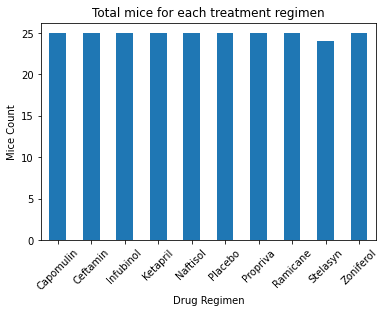

In [6]:
drug_grp = src.get_last_instance_data().groupby(by="Drug Regimen")
drug_grp['Mouse ID'].count().plot(kind="bar", title="Total mice for each treatment regimen")
plt.ylabel("Mice Count")
plt.xticks(rotation=45)
plt.show()

### 3b. Generate a plot using Matplotlib's pyplot that shows the total mice for each treatment regimen"

Text(0.5, 1.0, 'Total mice for each treatment regimen')

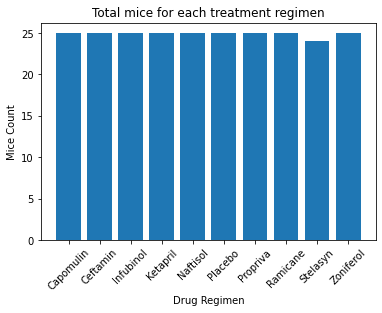

In [7]:
drug_grp = src.get_last_instance_data().groupby(by="Drug Regimen")
plt.bar(drug_grp.groups.keys(),drug_grp['Mouse ID'].count())
plt.xticks(rotation=45)
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.title("Total mice for each treatment regimen")

### 4a. Generate a pie plot using Panda's dataframe .plot() that shows the distribution of female or male mice in the study

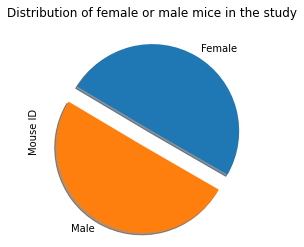

In [8]:
drug_grp = src.get_last_instance_data().groupby(by="Sex")
drug_grp['Mouse ID'].count().plot(kind='pie', title="Distribution of female or male mice in the study",explode = [0,0.2],shadow=True, startangle=-30)
plt.show()

### 4b. Generate a pie plot using Matplotlib's pyplot that shows the distribution of female or male mice in the study

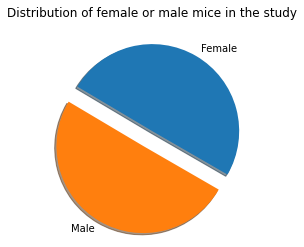

In [9]:
drug_grp = src.get_last_instance_data().groupby(by="Sex")
plt.pie(drug_grp['Mouse ID'].count(),labels=drug_grp.groups.keys(),explode = [0,0.2],shadow=True, startangle=-30)
plt.title("Distribution of female or male mice in the study")
plt.show()

### 5a. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

In [10]:
df = src.get_four_promising_treatments()
df

,Mouse ID,Sex,Final Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,s185,Female,23.343598
Capomulin,x401,Female,28.484033
Capomulin,m601,Male,28.430964
Capomulin,f966,Male,30.485985
Capomulin,u364,Male,31.023923
...,...,...,...
Ceftamin,x226,Male,45.000000
Ceftamin,x581,Female,64.634949
Ceftamin,x822,Male,61.386660


### 6a. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [11]:
df = src.get_four_promising_treatments()
grps = df.groupby("Drug Regimen")
summary_df = pd.DataFrame({},columns=["Name","LowerB","Min","Q1","IQR","Q3","Max","UpperB"])
outliers = []
for name, grp in grps:

    arr = grp['Final Tumor Volume (mm3)']

    [Q1, Q3] = sts.mstats.idealfourths(arr)
    IQR = sts.iqr(arr)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_row = pd.DataFrame({
                    "Name" : [name],
                    "LowerB": [f"{lower_bound:.1f}"],
                    "Min" : [f"{arr.min():.1f}"],
                    "Q1" : [f"{Q1:.1f}"],
                    "IQR" : [f"{IQR:.1f}"],
                    "Q3" : [f"{Q3:.1f}"],
                    "Max" : [f"{arr.max():.1f}"],
                    "UpperB" : [f"{upper_bound:.1f}"]
                })

    summary_df = summary_df.append(df_row)

    filt = ((arr < lower_bound) | (arr > upper_bound))
    if len(arr[filt]) > 0:
        outliers.append(arr[filt])

print("Outliers array:",outliers)

summary_df.set_index("Name")

Outliers array: []


,LowerB,Min,Q1,IQR,Q3,Max,UpperB
Name,,,,,,,
Capomulin,20.5,23.3,32.2,7.8,40.3,47.7,52.0
Ceftamin,25.0,45.0,48.4,15.6,64.4,68.9,87.8
Infubinol,36.0,36.3,53.2,11.5,65.7,72.2,82.9
Ramicane,17.8,22.1,31.4,9.1,40.7,45.2,54.3


### 6b. Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

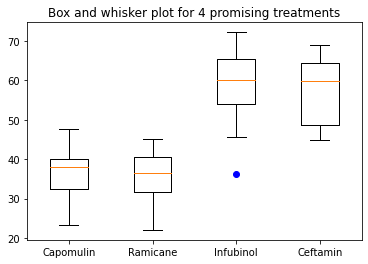

Mouse ID                         c326
Drug Regimen                Infubinol
Sex                            Female
Age_months                         18
Weight (g)                         25
Timepoint                           5
Final Tumor Volume (mm3)      36.3213
Metastatic Sites                    0
Name: 669, dtype: object

In [12]:
exercise6b()
df = src.get_last_instance_data()
filt = df["Drug Regimen"]=="Infubinol"
df = df[filt].rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})

df.loc[669]

### 7. Select a mouse that was treated with Capomulin and generate a line plot of time point versus tumor volume for that mouse.

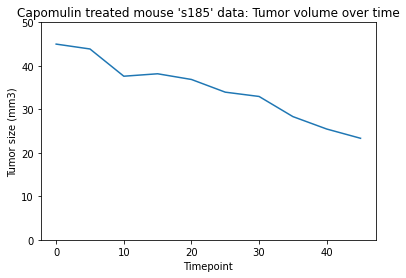

In [13]:
df = src.get_raw_data()
filt = df["Drug Regimen"] == "Capomulin"
mouse = df[filt].iloc[0,:]["Mouse ID"]
filt = df["Mouse ID"] == mouse
mouse_data = df[filt][["Timepoint","Tumor Volume (mm3)"]].set_index("Timepoint")

plt.plot(mouse_data)
plt.title(f"Capomulin treated mouse '{mouse}' data: Tumor volume over time")
plt.xlabel("Timepoint")
plt.ylim(0,50)
plt.ylabel("Tumor size (mm3)")
plt.show()

### 8. Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

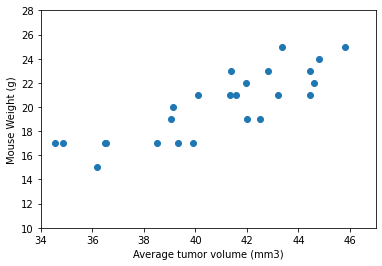

In [14]:
df = src.get_mouse_metadata()
filt = df["Drug Regimen"] == "Capomulin"
df_weight = df[filt][["Mouse ID", "Weight (g)"]]

df = src.get_raw_data()
filt = df["Drug Regimen"] == "Capomulin"
df = df[filt][['Mouse ID',"Tumor Volume (mm3)"]]
df_avg_tumor_volume = df.groupby(by="Mouse ID").mean()
df = df_weight.merge(df_avg_tumor_volume,on="Mouse ID",how='left')

plt.scatter(df['Tumor Volume (mm3)'],df["Weight (g)"])
plt.ylabel("Mouse Weight (g)")
plt.xlabel("Average tumor volume (mm3)")
plt.xlim(34,47)
plt.ylim(10,28)
plt.show()

### 9. Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

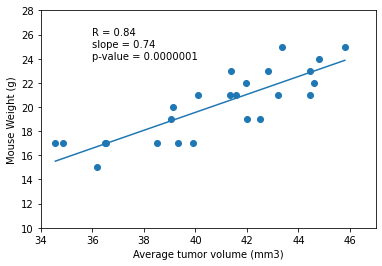

In [15]:
exercise9()

### 10a. Observation 1

Observation 1: Rat tumor size correlates with mouse weight, and it's statistically signficant


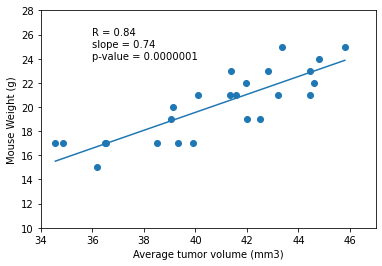

In [16]:
print("Observation 1: Rat tumor size correlates with mouse weight, and it's statistically signficant")
exercise9()

### 10b. Observation 2

In [17]:
print("Observation 2: Capomulin and Ramicane were the only treatments that on average decreased tumor size.")
generate_a_summary_table()

Observation 2: Capomulin and Ramicane were the only treatments that on average decreased tumor size.


,Drug Regimen,Starting Volume,Mean,% Change,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,,,
Capomulin,Ramicane,45.0,36.7,-22.7%,38.1,32.7,5.72,1.14
Ceftamin,Capomulin,45.0,57.8,22.1%,59.9,70.0,8.37,1.67
Infubinol,Infubinol,45.0,58.2,22.7%,60.2,74.0,8.60,1.72
Ketapril,Placebo,45.0,62.8,28.4%,64.5,98.9,9.95,1.99
Naftisol,Ceftamin,45.0,61.2,26.5%,63.3,106.0,10.30,2.06
Placebo,Stelasyn,45.0,60.5,25.6%,62.0,78.8,8.87,1.77
Propriva,Zoniferol,45.0,56.7,20.7%,55.8,69.3,8.33,1.67
Ramicane,Ketapril,45.0,36.2,-24.3%,36.6,32.2,5.67,1.13
Stelasyn,Propriva,45.0,61.0,26.2%,62.2,90.3,9.50,1.94


### 10c. Observation 3

Mouse c326 was an outlier in the Infubinol group. It looks like it's last timepoint was 5.. Did the mouse die?


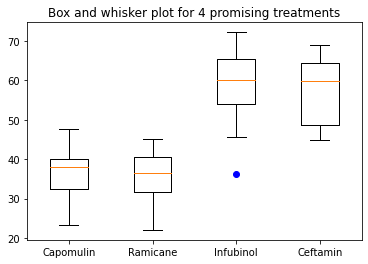

Mouse ID                         c326
Drug Regimen                Infubinol
Sex                            Female
Age_months                         18
Weight (g)                         25
Timepoint                           5
Final Tumor Volume (mm3)      36.3213
Metastatic Sites                    0
Name: 669, dtype: object

In [18]:
print("Mouse c326 was an outlier in the Infubinol group. It looks like it's last timepoint was 5.. Did the mouse die?")
exercise6b()
df = src.get_last_instance_data()
filt = df["Drug Regimen"]=="Infubinol"
df = df[filt].rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
display(df.loc[669])

## Option to quickly choose which DataFrame to work with
-----------

In [19]:
importlib.reload(src)
global df
dropdown = widgets.Dropdown(options=["SELECT DF",
                                     "mouse metadata",
                                     "study results",
                                     "raw data",
                                     "first instance", 
                                     "last instance",
                                     "promising treatments"])
src.show_dataset_dropdown(dropdown)

Dropdown(options=('SELECT DF', 'mouse metadata', 'study results', 'raw data', 'first instance', 'last instance…

##### Set the dataframe to the dropdown value

In [20]:
df = src.get_df_from_dropdown(dropdown.value)